In [46]:
from MLP_manual.mlp import MLP

Learning to sum numbers from 0 to 1

In [48]:
mlp_mul = MLP(2, [2], 1)

In [49]:
X = np.random.rand(2, 5000)

In [50]:
Y = X[0] * X[1]

In [56]:
mlp_mul.fit(X, Y, 10000, 5)

In [55]:
X_test = np.random.rand(2, 5)
print(X_test)
print('Actual multiplication')
print(X_test[0] * X_test[1])
print('What mlp thinks about multiplication')
print(mlp_mul.forward_propagat(X_test))

[[0.4171642  0.52319888 0.51340882 0.31661145 0.90369721]
 [0.97776458 0.57058395 0.1512756  0.09840329 0.61013899]]
Actual multiplication
[0.40788838 0.29852888 0.07766623 0.03115561 0.5513809 ]
What mlp thinks about multiplication
[[0.42343674 0.31508357 0.07778883 0.04075884 0.59960207]]


## here is digit recognition mlp

In [9]:
from get_dataset import DigitExample, show_array_as_image, jpg2data

In [40]:
X_data, Y_target = jpg2data(N = 3000)

In [43]:
mlp_digit = MLP()

In [44]:
mlp_digit.fit(X_data.T, Y_target.T, 1000, 5)

/home/aram/ml_github/first-steps-in-ML/handwritten_digit_recognition/MLP_manual/mlp.py:7: RuntimeWarning: overflow encountered in exp
  self.sigma_activation =  lambda x: 1/ (np.exp(-x) + 1)


4


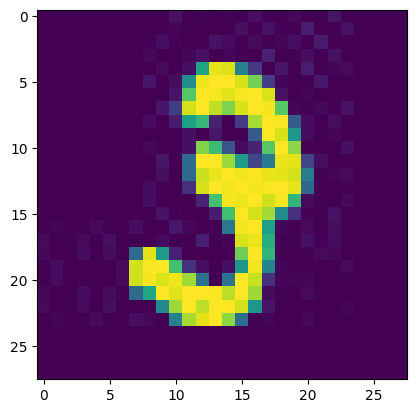

In [62]:
a = 10000
show_array_as_image(X_data[a].reshape(28, 28), mlp_digit.forward_propagat(X_data[a].T).reshape(-1,))